In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
print(tf.__version__)

2.19.0


Load fasion_mnist dataset from keras

In [5]:
dir(keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'california_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [6]:
mnist=keras.datasets.fashion_mnist

In [7]:
mnist

<module 'keras.datasets.fashion_mnist' from '/usr/local/lib/python3.12/dist-packages/keras/datasets/fashion_mnist/__init__.py'>

In [8]:
type(mnist)

module

Now we load data into real variables usind load_data()
It returns 2 tuples.
1st tuple has training data
2nd tuple has test data

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Data consists of images which means it has pixel values.
By using shape we can see that it has 6k images for training

In [12]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [15]:
len(X_train[1][0]),len(X_train[1])

(28, 28)

In [16]:
X_train[0].shape
X_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  98,
          0, 103,  59,  68,  71,  49,   0, 219, 206, 214, 210, 250,  38,
          0,   0],
       [  0,   0,   0,   0, 247, 218, 212, 210, 215, 214,   0, 254, 243,
        139, 255, 174, 251, 255, 205,   0, 215, 217, 214, 208, 220,  95,
          0,   0],
       [  0,   0,   0,  45, 226, 214, 214, 215, 224, 205,   0,  42,  35,
         60,  16,  17,  12,  13,  70,   0, 189, 216, 212, 206, 212, 156,
          0,   0],
       [  0,   0,   0, 164, 235, 214, 211, 220, 216, 201,  52,  71,  89,
         94,  83,  78,  70,  76,  92,  87, 206, 207, 222, 213, 219, 208,
          0,   0],
       [  0,   0,   0, 106, 187, 223, 237, 248, 211, 198, 252, 250, 248,
        245, 248, 252, 253, 250, 252, 239, 201, 212, 225, 215, 193, 113,
          0,   0],
       [  0,   0,   0,   0,   0,  17,  54, 159, 222, 193, 208, 192, 197,
        200, 200, 200, 200, 201, 203, 195, 210, 165,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 225, 192, 214, 203, 206,
        204, 204, 205, 206, 204, 212, 197, 218, 107,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   6,   0,  46, 212, 195, 212, 202, 206,
        205, 204, 205, 206, 204, 212, 200, 218,  91,   0,   3,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  11, 197, 199, 205, 202, 205,
        206, 204, 205, 207, 204, 205, 205, 218,  77,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   2, 191, 198, 201, 205, 206,
        205, 205, 206, 209, 206, 199, 209, 219,  74,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 188, 197, 200, 207, 207,
        204, 207, 207, 210, 208, 198, 207, 221,  72,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 215, 198, 203, 206, 208,
        205, 207, 207, 210, 208, 200, 202, 222,  75,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 212, 198, 209, 206, 209,
        206, 208, 207, 211, 206, 205, 198, 221,  80,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 201, 205, 208, 207,
        205, 211, 205, 210, 210, 209, 195, 221,  96,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 202, 201, 205, 209, 207,
        205, 213, 206, 210, 209, 210, 194, 217, 105,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 204, 205, 208, 207,
        205, 215, 207, 210, 208, 211, 193, 213, 115,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 204, 207, 207, 208, 206,
        206, 215, 210, 210, 207, 212, 195, 210, 118,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 208, 208, 208, 204,
        207, 212, 212, 210, 207, 211, 196, 207, 121,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   

In [18]:
y_train
#X_train[0] has output of y_train[0]=9

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [19]:
class_names=['top','trouser','pullover','dress','coat',
             'sandal','shirt','sneaker','bag','ankle boot']

Data Exploration

In [20]:
X_train.shape

(60000, 28, 28)

In [21]:
X_test.shape

(10000, 28, 28)



*   Here we have plotted the second image of our training set i.e image at index 1
*   plt.figure() to create new figure
*   plt.imshow() to display as image
*   plt.colorbar() displays colrbar beside image





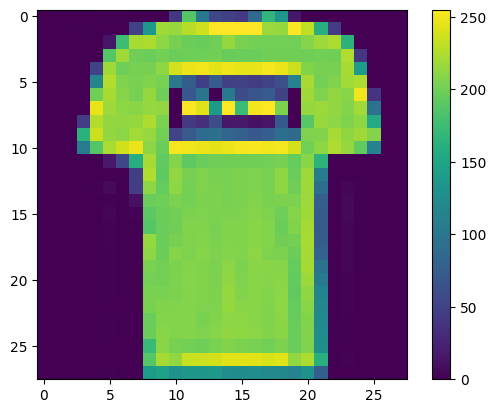

In [22]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
plt.show()

In [23]:
y_train[1]

np.uint8(0)

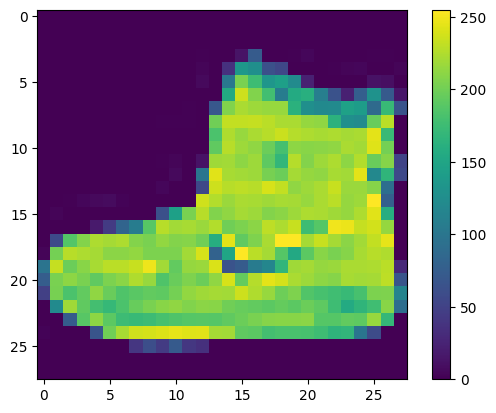

In [24]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

In [25]:
y_train[0]

np.uint8(9)

Instead of checking the matplotlib and output we can check like the below directly

In [26]:
y_train[0]

class_names[y_train[0]]

'ankle boot'

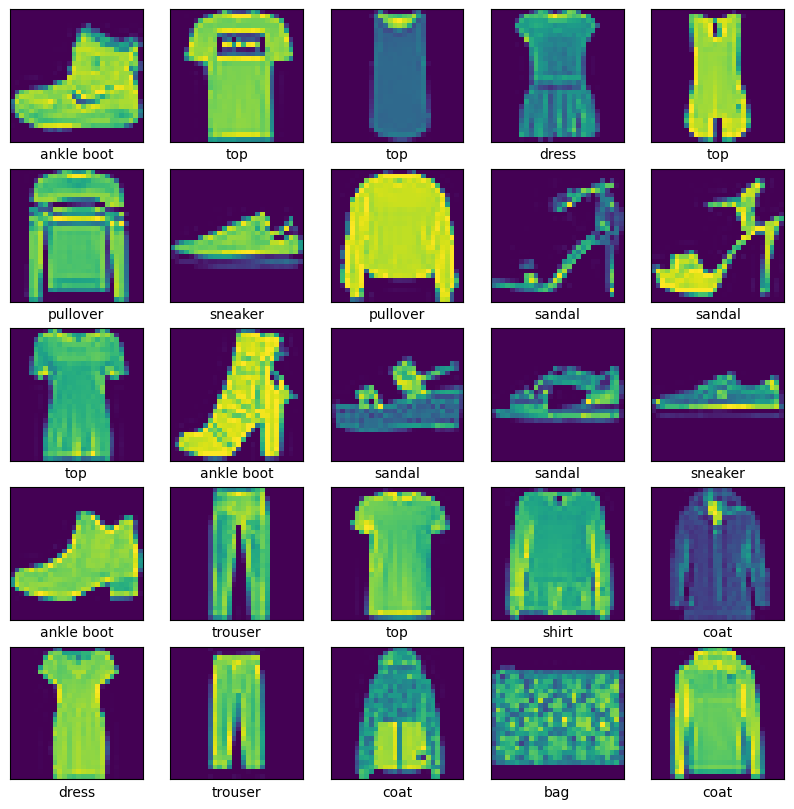

In [27]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i]])
plt.show()

Normalization

range=(0,1)

Neural networks doesnt take values greater than 1.

So we need to bring all values between 0 and 1.

To do this we will divide all the values in the training and testing dataset by 255 as the greatest value in our dataset is 255.

In [28]:
X_train=X_train/255.0
X_test=X_test/255.0

Now we can see all the values are between 0 and 1.

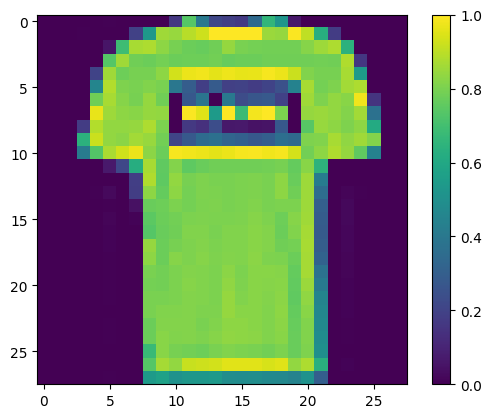

In [29]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

We read the data.

we understand the data.

we understand thw shape of data
we plot data.

we understand the labels of data
we normalize the data.

here train and test data both are available.

here X(input data),y(output data) already provided.

We will import neccesary layers to build the model.
-input layer
-hidden layers
-output layer

In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

Output layer has 10 classes.So activation for multiclass is Softmax.

Softmax converts real vector to a vector of categorical probabilities.

Range=(0,1) and sum to 1.

In [31]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))#784*128+128(bias)
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

**Model Compilation**

-Loss function
-Optimizer
-Metrics

log loss(Binary cross entropy)

Cross Entropy

In [33]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7808 - loss: 0.6349
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8638 - loss: 0.3840
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8770 - loss: 0.3381
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8820 - loss: 0.3181
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8898 - loss: 0.2971
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8944 - loss: 0.2811
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9013 - loss: 0.2682
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9052 - loss: 0.2568
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9073 - loss: 0.2464
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9115 - loss: 0.2354


By default batch size=32
 we have 60k samples here
 for every batch 32 samples will pass through the training

 So 60k/32=1875 batches required to complete 60k observations

 Then we can say 1 training iteration or 1 epoch is completed

In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,batch_size=64,verbose=True)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9385 - loss: 0.1640
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9414 - loss: 0.1599
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9425 - loss: 0.1534
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9459 - loss: 0.1493
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9430 - loss: 0.1509
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9457 - loss: 0.1447
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9480 - loss: 0.1392
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9481 - loss: 0.1401
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9502 - loss: 0.1336
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9513 - loss: 0.1319


In [36]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8914 - loss: 0.3745
0.8888999819755554


In [37]:
from sklearn.metrics import accuracy_score
ypred=model.predict(X_test)
ypred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[2.7036373e-14, 1.0905540e-12, 1.8094060e-13, ..., 7.6668417e-05,
        2.9393234e-11, 9.9992281e-01],
       [2.0735326e-05, 3.6583001e-15, 9.9892634e-01, ..., 1.8618301e-24,
        7.5362334e-17, 2.8153234e-16],
       [1.2654072e-14, 9.9999994e-01, 2.1692725e-21, ..., 3.4318661e-31,
        5.8516267e-15, 4.4137473e-26],
       ...,
       [8.9785089e-11, 1.5431410e-20, 4.3016009e-13, ..., 2.6108113e-12,
        9.9999994e-01, 1.6055152e-17],
       [1.6604002e-12, 9.9999994e-01, 1.1206032e-18, ..., 2.6981270e-29,
        1.8052185e-10, 9.3302640e-18],
       [9.1991330e-09, 3.4014135e-15, 8.4320034e-10, ..., 3.6369747e-06,
        2.4626681e-06, 6.5235350e-09]], dtype=float32)

In [38]:
len(ypred)

10000

In [39]:
np.sum(ypred[0])

np.float32(0.9999999)

Text(0.5, 0, 'ankle boot')

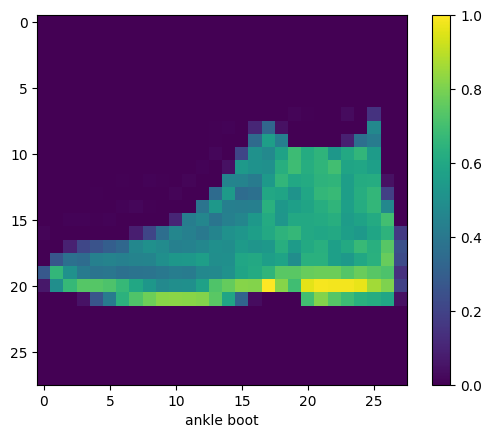

In [41]:
plt.figure()
plt.imshow(X_test[0])
plt.colorbar()
plt.xlabel(class_names[np.argmax(ypred[0])])

In [42]:
np.max(ypred[0])

np.float32(0.9999228)

In [44]:
np.argmax(ypred[0])

np.int64(9)

In [49]:
max_values=[np.max(i) for i in ypred]
index=[np.argmax(i) for i in ypred]
prediction=[class_names[i] for i in index]
Ground_Truth=[class_names[i] for i in y_test]
d1=pd.DataFrame(zip(max_values,index,prediction,Ground_Truth),columns=['Max','Index','Prediction','Ground_Truth'])
d1['Output']=d1['Prediction']==d1['Ground_Truth']
accuracy=np.sum(np.array(prediction)==np.array(Ground_Truth))/len(prediction)
print(accuracy)

0.8889
